In [1]:
# 先導入資料處理會用到的模組
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化模組
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

""" 
Seaborn：讓 Matplotlib 的圖表更美觀的函式庫，
只需匯入便能讓圖表變得更美觀，還能指定數個增加的樣式。
"""

# 機器學習模組
import sklearn

In [2]:
# 讀檔
dataset = pd.read_csv('titanic/train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 觀察資料幾列幾行
dataset.shape

(891, 12)

In [4]:
# 觀察整個資料集的資訊
dataset.info()

"""
12 個 欄位，type 總共三種
– float64 ( 有 2 個 )
– int64 ( 有 5 個 )
– object ( 有 5 個 )
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


'\n12 個 欄位，type 總共三種\n– float64 ( 有 2 個 )\n– int64 ( 有 5 個 )\n– object ( 有 5 個 )\n'

In [5]:
# 設定seaborn為預設繪圖library
sns.set()

In [6]:
"""
因為要預測生還率
• 所以以「 survived 、 dead 」為 X 軸
• 繪製其他 feature 相對於「 survived 、 dead 」的關係

bar_chart 函式：在這個 function 裡輸入任何 feature，就可以觀察你想看的 feature。
"""

def bar_chart(feature):
    survived = dataset[ dataset['Survived'] == 1 ][feature].value_counts()
    dead = dataset[ dataset['Survived'] == 0 ][feature].value_counts()
    
    df = pd.DataFrame( [ survived , dead ] )
    df.index = ['Survived','Dead']
    
    df.plot( kind = 'bar' , stacked = True , figsize = ( 10 , 5 ) )

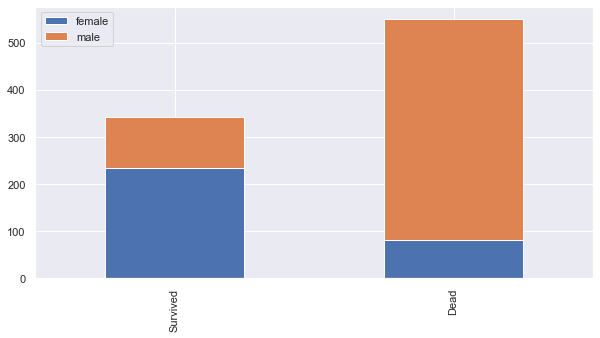

In [7]:
# 分別秀出生還/死亡的男女長條圖
bar_chart('Sex')

# The Chart confirms that "Women more likely survivied than Man".

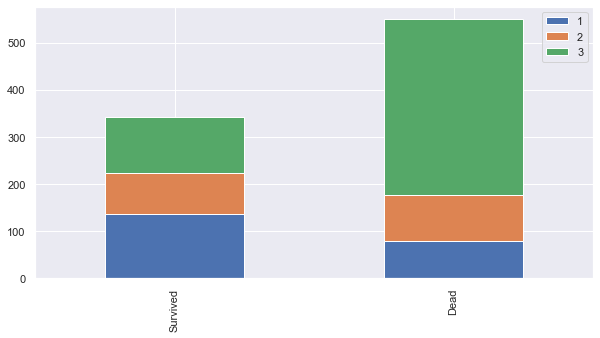

In [8]:
# 分別秀出生還/死亡的艙等長條圖
bar_chart('Pclass')

# The Chart confirms that "1st class more likely survivied than other classed".
# The Chart confirms that "3rd class more likely dead than other classed".

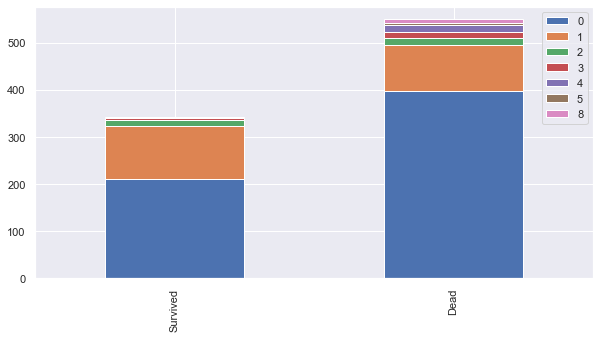

In [9]:
# 分別秀出生還/死亡的有兄弟姐妹或配偶的長條圖
bar_chart('SibSp')

# The Chart confirms that "A person aboarded more than 2 siblings or spouse likely survivied".
# The Chart confirms that "A person aboarded without siblings or spouse likely dead".

In [10]:
# 計算各個行(欄位)裡有多少個 “ NaN ”
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Name

In [11]:
# 資料補值

# 觀察 Name欄位
dataset['Name']

# 名字當中隱含許多額外的資料 Mr. / Mrs. / Dr / Miss. …，可以作為之後補值的類別參考。

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [12]:
# 取出 Mr. , Mrs. , Miss.
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

# "正則表達式"： '空格' + 字母 + '.'

In [13]:
# 統計各稱謂的人數
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Don           1
Capt          1
Ms            1
Lady          1
Countess      1
Sir           1
Mme           1
Name: Title, dtype: int64

In [14]:
# 現在的 dataset
# dataset.head(50)

In [15]:
# 依照這三大類 ( Mr. , Mrs. , Miss. ) 去定義一個 mapping function。
# 統一以 0 、 1 、 2 、 3 去做編號，自行填入的 '?'處

# titlemapping by function
def title_map(x):
#     title = 3 if (x != "Mr" and x != "Miss" and x != "Mrs") else x
    title = ''
    if x == "Mr":
        title = 0
    elif x == "Miss" :
        title = 1
    elif x == "Mrs":
        title = 2
    else:
        title = 3
    return title

dataset["Title"] = dataset["Title"].map(title_map) #注意這裡傳入的是函數名，不帶括號。

# titlemapping by dictionary
# title_mapping = { "Mr": 0 , "Miss": 1 , "Mrs": 2 ...}
title_mapping = { "Mr": 0 , "Miss": 1 , "Mrs": 2 ,  
                  "Master": 3 , "Dr": 3 , "Rev": 3 ,
                  "Mlle": 3 , "Major": 3 , "Col": 3 ,
                  "Sir": 3 , "Countess": 3 , "Jonkheer": 3 ,
                  "Mme": 3 , "Don": 3 , "Ms": 3 , 
                  "Lady": 3 , "Capt": 3 , 
                  0 : 0 , 1 : 1 , 2 : 2 , 3 : 3 }
dataset['Title'] = dataset['Title'].map(title_mapping)

In [16]:
# 現在的 dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [17]:
# 現在的 dataframe
dataset['Title']

0      0
1      2
2      1
3      2
4      0
      ..
886    3
887    1
888    1
889    0
890    0
Name: Title, Length: 891, dtype: int64

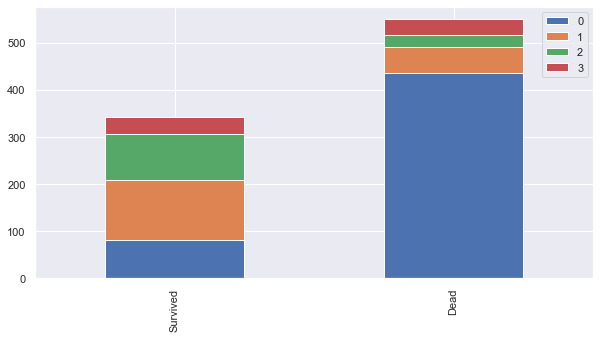

In [18]:
# 秀出 Title/生還死亡的分佈
bar_chart('Title')

In [19]:
# 資料清洗：刪除不需要的欄位，Name 已轉換成一個新的 class 了，Name 與 生存/死亡無關。

# delete unnecessary feature from dataset：刪除 Name欄位
dataset.drop('Name', axis = 1 , inplace = True)

In [20]:
# 目前的 dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


# Sex

In [21]:
# mapping sex
sex_mapping = { "male": 0 , "female": 1 }

dataset['Sex'] = dataset['Sex'].map(sex_mapping)

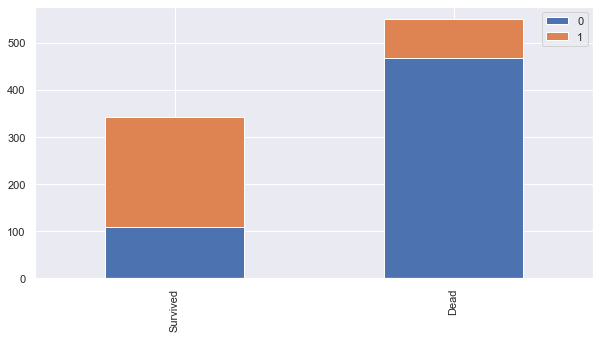

In [22]:
bar_chart('Sex')

In [23]:
# 目前的 dataframe
dataset.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


# Age

In [24]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
# 利用 Title 變成一組，去填補年齡的中位數
dataset["Age"].fillna(dataset.groupby("Title")["Age"].transform("median"), inplace = True)
dataset["Age"]
dataset.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


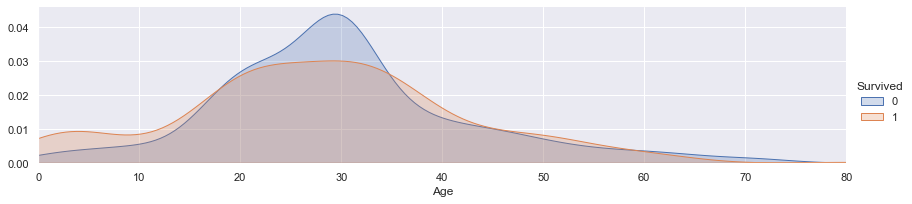

In [25]:
# 年齡/生還死亡分布圖
facet = sns.FacetGrid( dataset , hue = "Survived" , aspect = 4 )
facet.map( sns.kdeplot , 'Age' , shade = True )
facet.set( xlim = ( 0 , dataset['Age'].max() ) )
facet.add_legend()
 
plt.show()

In [26]:
# 依年齡區間做 mapping function
# 年齡範圍太大，類別太多，使用區間分成 0,1,2,3,4
dataset.loc[ dataset['Age'] <= 16 , 'Age' ] = 0
dataset.loc[ (dataset['Age'] > 16) & (dataset['Age'] <= 26) , 'Age' ] = 1
dataset.loc[ (dataset['Age'] > 26) & (dataset['Age'] <= 36) , 'Age' ] = 2
dataset.loc[ (dataset['Age'] > 36) & (dataset['Age'] <= 62) , 'Age' ] = 3
dataset.loc[ dataset['Age'] > 62 , 'Age' ] = 4

In [27]:
# 目前的 dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


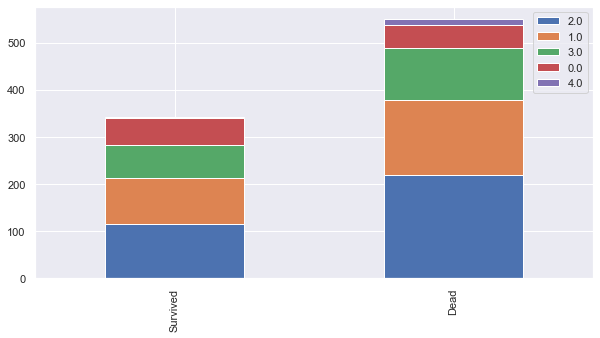

In [28]:
#秀 出年齡/生還死亡的分佈
bar_chart('Age')

# Embarked (登船地點)

'\nMore than 50% of 1st/2nd/3rd class are from S embark.\n'

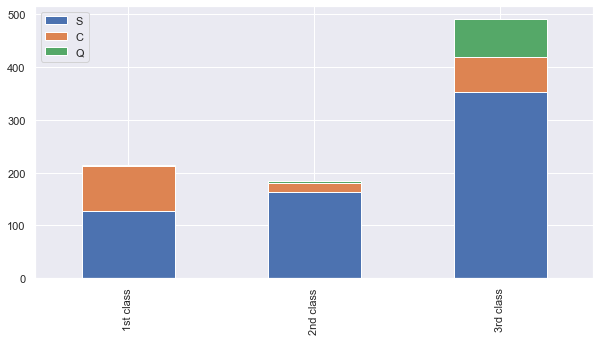

In [29]:
# 分析各票種登船地點人數
Pclass1 = dataset[ dataset['Pclass'] == 1 ]["Embarked"].value_counts()
Pclass2 = dataset[ dataset['Pclass'] == 2 ]["Embarked"].value_counts()
Pclass3 = dataset[ dataset['Pclass'] == 3 ]["Embarked"].value_counts()
df = pd.DataFrame( [ Pclass1 , Pclass2 , Pclass3 ] )

df.index = ['1st class','2nd class', '3rd class']
df.plot( kind = 'bar' , stacked = True , figsize = (10,5) )

"""
More than 50% of 1st/2nd/3rd class are from S embark.
"""

In [30]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
# 填補登船地點缺失資料
# 因為每個艙等都超過 50% 是 從"s"登船的，所以登船地點可以補上 "s"
dataset["Embarked"] = dataset["Embarked"].fillna('S')
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [32]:
# 登船地點的 Mapping Function
embarked_mapping = { "S": 0 , "C": 1 , "Q": 2 }
dataset["Embarked"] = dataset["Embarked"].map(embarked_mapping)
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,2.0,0,0,374910,8.0500,NaN,0,0
96,97,0,1,0,4.0,0,0,PC 17754,34.6542,A5,1,0
97,98,1,1,0,1.0,0,1,PC 17759,63.3583,D10 D12,1,0
98,99,1,2,1,2.0,0,1,231919,23.0000,NaN,0,2


# Fare(票價)

In [33]:
dataset['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

In [34]:
# 填補票價缺失的資料 
dataset["Fare"].fillna(dataset.groupby("Pclass")["Fare"].transform("median"), inplace = True)
dataset.head(15)
# dataset['Fare'].value_counts()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


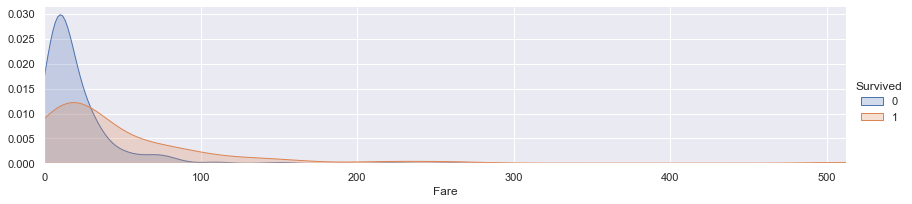

In [35]:
# 票價/生還死亡分布圖
facet = sns.FacetGrid( dataset , hue = "Survived" , aspect = 4 )
facet.map( sns.kdeplot , 'Fare' , shade = True )
facet.set( xlim = (0 , dataset['Fare'].max()) )
facet.add_legend()
 
plt.show()

In [36]:
# 依票價區間做 mapping function
dataset.loc[ dataset['Fare'] <= 17 , 'Fare' ] = 0
dataset.loc[ (dataset['Fare'] > 17) & (dataset['Fare'] <= 30) , 'Fare' ] = 1
dataset.loc[ (dataset['Fare'] > 30) & (dataset['Fare'] <= 100) , 'Fare' ] = 2
dataset.loc[ dataset['Fare'] > 100 , 'Fare' ] = 3

In [37]:
# 目前的 dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [38]:
# 觀察船艙編號資料
dataset['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
F2             3
              ..
B101           1
A14            1
C106           1
C46            1
A32            1
Name: Cabin, Length: 147, dtype: int64

In [39]:
# 觀察船艙編號資料 =>取出第一個字母
dataset['Cabin'] = dataset['Cabin'].str[:1]
dataset['Cabin']
dataset['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

<AxesSubplot:>

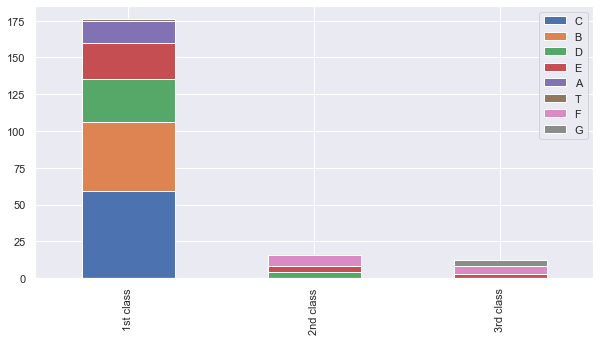

In [40]:
# 分析各票種船艙種類人數
Pclass1 = dataset[ dataset['Pclass'] == 1 ]["Cabin"].value_counts()
Pclass2 = dataset[ dataset['Pclass'] == 2 ]["Cabin"].value_counts()
Pclass3 = dataset[ dataset['Pclass'] == 3 ]["Cabin"].value_counts()
df = pd.DataFrame( [ Pclass1 , Pclass2 , Pclass3 ] )

df.index = ['1st class','2nd class', '3rd class']
df.plot( kind = 'bar' , stacked = True , figsize = (10,5) )

In [41]:
# 船艙 Mapping
cabin_mapping = { "A": 0 , "B": 0.4 , "C": 0.8 , "D": 1.2 , "E": 1.6 ,
                  "F": 2 , "G": 2.4 , "T": 2.8 }
dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [42]:
# 填補船艙種類缺失資料
dataset["Cabin"].fillna(dataset.groupby("Pclass")["Cabin"].transform("median"), inplace = True)

In [43]:
# 目前的 dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


# Sibsp & Parch

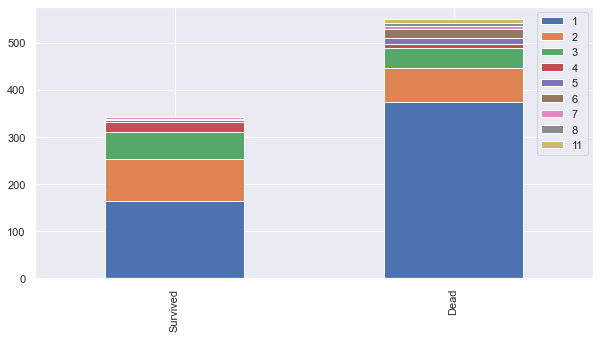

In [44]:
# 合併 Sibsp & Parch
# Sibsp : siblings / spouses aboard the Titanic
# Parch : of parents / children aboard the Titanic
dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1    # 包括自己本人
bar_chart('FamilySize')

In [45]:
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,0.0,1.8,0,3,1
887,888,1,1,1,1.0,0,0,112053,1.0,0.4,0,1,1
888,889,0,3,1,1.0,1,2,W./C. 6607,1.0,2.0,0,1,4
889,890,1,1,0,1.0,0,0,111369,1.0,0.8,1,0,1


(0.0, 11.0)

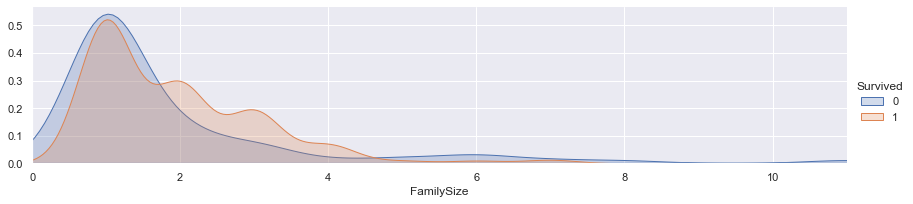

In [46]:
# 家族人口/生還死亡分布圖
facet = sns.FacetGrid( dataset, hue = "Survived" , aspect = 4 )
facet.map( sns.kdeplot , 'FamilySize' , shade = True )
facet.set( xlim = (0 , dataset['FamilySize'].max()) )
facet.add_legend()
plt.xlim(0)

In [47]:
# 家族人口的 Mapping Function
family_mapping = { 1: 0 , 2: 0.4 , 3: 0.8 , 4: 1.2 , 5: 1.6 ,
                  6: 2 , 7: 2.4 , 8: 2.8 , 9: 3.2 , 10: 3.6 , 11: 4 }
dataset["FamilySize"] = dataset["FamilySize"].map(family_mapping)

In [48]:
# 目前的 dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


# 資料清洗

In [49]:
# 刪除 SibSp, Parch, Ticket
features_drop = ['SibSp', 'Parch', 'Ticket', 'PassengerId']
dataset = dataset.drop(features_drop, axis = 1)

In [50]:
# 設定預測目標變數與解釋變數
# 目標變數 :survived
# 其餘為解釋變數，將欄位分開儲存

dataset_data = dataset.drop('Survived', axis = 1)
dataset_target = dataset['Survived']

# Survived 為 Series，加入中括號轉成 DataFrame
dataset_target2 = dataset[['Survived']]

dataset_data.shape, dataset_target.shape, dataset_target2.shape

((891, 8), (891,), (891, 1))

In [51]:
dataset_target2

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [52]:
# 目前的所有解釋變數
dataset_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [53]:
# 確認欄位的資料型態均為數值型別
dataset_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Cabin       891 non-null    float64
 5   Embarked    891 non-null    int64  
 6   Title       891 non-null    int64  
 7   FamilySize  891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


# 建置模型

In [54]:
# 建置繪圖函式
def show_train_history( train_history , train , validation , label ):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(label)
    plt.xlabel('Epoch')  # 不同回合的變化
    
    plt.legend( ['train','validation'] , loc = 'upper left' )
    plt.show()

# DNN

In [55]:
# 導入 keras 與 sklearn
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import Adam

"""
Keras：python 的深度學習函式庫
– 提供非常多常用的深度學習的類神經網路元件
– 包括卷積層、遞歸層
– 簡潔、可讀性高

TensorFlow 是一個機器學習框架
– 如果使用者有非常多的資料就可以透過 TensorFlow 快速的訓練一個有用的模式。
- 例如 利用類神經網路做文字的辨識 。
- 用於各種感知和語言理解任務的機器學習。
"""

from sklearn import preprocessing

In [56]:
# 建立模型函式，units : 指定神經元數量
def build_DNN_model():
    # 建立模型
    model = Sequential()
    # 將模型疊起
    model.add( Dense(input_dim = 8 , units = 40) ) # Hint : 每筆資料的欄位數
    model.add(Activation('relu'))
    model.add( Dense(units = 150) )
    model.add(Activation('relu'))
    model.add( Dense(units = 15) )
    model.add(Activation('relu'))
    model.add( Dense(units = 50) )
    model.add(Activation('relu'))
    model.add( Dense(units = 1) )                   # Hint : 二元分類
    model.add(Activation('sigmoid'))
    model.summary()
    return model

In [57]:
# feature標準化
minmax_scale = preprocessing.MinMaxScaler(feature_range = (0, 1))
scaledFeatures = minmax_scale.fit_transform(dataset_data)

# 標準化之後的數字。都介於 0 1 之間

In [58]:
# 訓練模型
DNN_model = build_DNN_model()

#開始訓練模型
DNN_model.compile( loss = 'binary_crossentropy' , optimizer = "adam" , metrics = ["acc"] )
DNN_train_history = DNN_model.fit( dataset_data , dataset_target2 , validation_split = 0.1 , batch_size = 30 , epochs = 25)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                360       
_________________________________________________________________
activation (Activation)      (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               6150      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                2265      
_________________________________________________________________
activation_2 (Activation)    (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                8

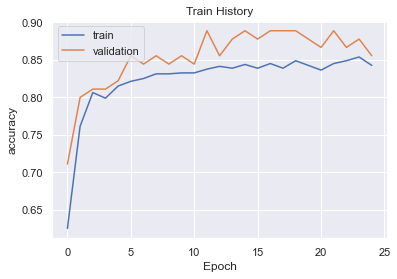

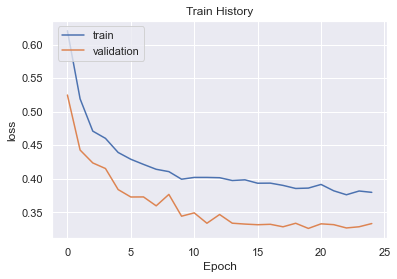

In [59]:
# 顯示訓練結果
show_train_history(DNN_train_history, 'acc', 'val_acc', 'accuracy')
show_train_history(DNN_train_history, 'loss', 'val_loss', 'loss')

In [60]:
# 整理測試資料
testset = pd.read_csv('titanic/test.csv')

testset['Title'] = testset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
testset['Title'] = testset['Title'].map(title_map)
testset.drop('Name', axis = 1 , inplace = True)

testset['Sex'] = testset['Sex'].map(sex_mapping)

testset["Age"].fillna(testset.groupby("Title")["Age"].transform("median"), inplace = True)
testset.loc[ testset['Age'] <= 16 , 'Age' ] = 0
testset.loc[ (testset['Age'] > 16) & (testset['Age'] <= 26) , 'Age' ] = 1
testset.loc[ (testset['Age'] > 26) & (testset['Age'] <= 36) , 'Age' ] = 2
testset.loc[ (testset['Age'] > 36) & (testset['Age'] <= 62) , 'Age' ] = 3
testset.loc[ testset['Age'] > 62 , 'Age' ] = 4

testset["Embarked"] = testset["Embarked"].fillna('S')
testset["Embarked"] = testset["Embarked"].map(embarked_mapping)

testset["Fare"].fillna(testset.groupby("Age")["Fare"].transform("median"), inplace = True)

testset.loc[ testset['Fare'] <= 17 , 'Fare' ] = 0
testset.loc[ (testset['Fare'] > 17) & (testset['Fare'] <= 30) , 'Fare' ] = 1
testset.loc[ (testset['Fare'] > 30) & (testset['Fare'] <= 100) , 'Fare' ] = 2
testset.loc[ testset['Fare'] > 100 , 'Fare' ] = 3

testset['Cabin'] = testset['Cabin'].str[:1]
testset["Cabin"] = testset["Cabin"].map(cabin_mapping)
testset["Cabin"].fillna(testset.groupby("Fare")["Cabin"].transform("median"), inplace = True)

testset["FamilySize"] = testset["SibSp"] + testset["Parch"] + 1    # 包括自己本人
testset["FamilySize"] = testset["FamilySize"].map(family_mapping)

testset = testset.drop(features_drop, axis = 1)

testset.info()
testset.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   Cabin       418 non-null    float64
 5   Embarked    418 non-null    int64  
 6   Title       418 non-null    int64  
 7   FamilySize  418 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 26.2 KB


,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
413,3,0,2.0,0.0,2.0,0,0,0.0
414,1,1,3.0,3.0,0.8,1,3,0.0
415,3,0,3.0,0.0,2.0,0,0,0.0
416,3,0,2.0,0.0,2.0,0,0,0.0
417,3,0,0.0,1.0,0.8,1,3,0.8


In [61]:
submit_set = pd.read_csv('titanic/gender_submission.csv')
submit_set

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [62]:
DNN_probability = DNN_model.predict(testset)
# print(probability)

DNN_predict_set = pd.DataFrame()
DNN_predict_set["PassengerId"] = submit_set["PassengerId"]
DNN_predict_set["Survived"] = DNN_probability
# print(predict_set)

def predict_map(x):
#     title = 3 if (x != "Mr" and x != "Miss" and x != "Mrs") else x
    predict = ''
    if x < 0.5:
        predict = 0
    else:
        predict = 1
    return predict

DNN_predict_set["Survived"] = DNN_predict_set["Survived"].map(predict_map) #注意這裡傳入的是函數名，不帶括號。

print(DNN_predict_set)

DNN_predict_set.to_csv("Submission_DNN.csv", index = 0)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [63]:
test_target = submit_set.drop("PassengerId", axis = 1)

DNN_score = DNN_model.evaluate( x = testset , y = test_target)

print ('\nTest Acc:', DNN_score[1])

14/14 [==============================] - 0s 2ms/step - loss: 0.3357 - acc: 0.8923

Test Acc: 0.8923444747924805


In [64]:
# get weights，獲取第一層的 w , b
W , b = DNN_model.layers[0].get_weights()
print("weights = \n{}, \n\nbiases = \n{}".format(W, b))

weights = 
[[-0.3168304   0.15251106 -0.28464076 -0.12460452  0.25240818 -0.24731854
   0.2614404  -0.31115478 -0.11863527  0.18668905 -0.33210006 -0.01213498
  -0.24813044  0.23753662  0.22641015 -0.25532833  0.37986377 -0.16712403
   0.2546168   0.33456722 -0.09195438 -0.26578882  0.21104655 -0.27783152
  -0.25089106  0.18850434 -0.28962892  0.19160612  0.3327715  -0.12131422
   0.14773533 -0.13076442 -0.31075925 -0.04026464  0.07875716 -0.2651914
   0.12954707 -0.04507583  0.10452546  0.30490357]
 [ 0.30043897 -0.106693   -0.2776237   0.24388994  0.05621102  0.34720746
   0.43363333 -0.22149143  0.2361488  -0.13396874 -0.05280974  0.02871152
   0.3911472   0.16630363 -0.08750098 -0.27033216  0.14317784 -0.38222468
   0.42569003 -0.16133995  0.3448955  -0.2548718  -0.08900905 -0.2601915
   0.18354958 -0.24310486 -0.03906541 -0.2905434   0.30274278  0.18412021
  -0.19161154 -0.2645865  -0.2599067  -0.30520794  0.16141468  0.35138762
  -0.26029393  0.12397038  0.2698758  -0.33986244]
 

In [65]:
# 以 HDF5格式 儲存模型
DNN_model.save('titanic_DNN.h5')

# 下次要使用模型時，再 load_model
from keras.models import load_model
DNN_model = load_model('titanic_DNN.h5')

# Random Forest

In [66]:
# 標籤編碼(Label)、獨熱編碼(OneHot)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

# 決策樹(Decision Tree)
from sklearn.tree import DecisionTreeClassifier

# 隨機森林(Random Forest)
from sklearn.ensemble import RandomForestClassifier

from IPython.display import display
import warnings
warnings.filterwarnings( 'ignore' )

In [67]:
# 特徵重要性(Feature Importance)
"""
我們使用最基本的樹狀模型 - 決策樹(Decision Tree)，來評估特徵欄位對於標籤欄位(Survived)的重要性。
目的是幫助我們篩選較具關鍵性的特徵欄位，提升模型的預測能力。
"""

# 建立決策樹模型
DTC = RandomForestClassifier( )

# 自變數、應變數進行擬合
DTC.fit( dataset_data , dataset_target2 )

# 排序特徵重要性(由大到小)
col_names = dataset_data.columns
importances = DTC.feature_importances_
Feature_Rank = pd.DataFrame( { 'Feature_Name':col_names, 'Importance':importances } )
Feature_Rank.sort_values( by='Importance', ascending=False, inplace=True ) 
Feature_Rank

,Feature_Name,Importance
6,Title,0.231181
1,Sex,0.197773
7,FamilySize,0.129061
4,Cabin,0.125543
2,Age,0.102946
0,Pclass,0.082449
3,Fare,0.079030
5,Embarked,0.052016


In [68]:
"""
在完成評估特徵重要性後，我們選擇使用隨機森林(Random Forest)來預測資料。
由於在森林中每一棵樹的生成方法為拔靴法(Boostrap)，表示每一棵樹並不會用到所有的訓練集資料來生成。
而未使用的樣本稱為袋外樣本(Out of Bag Sample)，其可用來評估預測的準確度。
每一顆樹皆以這種方式生成，最後對所有樹的準確度取平均值，這便是隨機森林的特性。
"""

# 隨機森林參數：
# n_estimators: 樹的數量 (default=10)。
# min_samples_leaf: 最終葉節點最少樣本數 (default=1)；當樣本不大時，可不設定使用預設，若樣本數量非常大時，則推薦增加此參數值。
# min_samples_split:節點再劃分時所需的最小樣本數(default=2)；當樣本不大時，可不設定使用預設，若樣本數量非常大時，則推薦增加此參數值。
# oob_score: 是否採用袋外樣本(out-of-bag samples)來評估模型的準確度(default=False)。

RFC = RandomForestClassifier( n_estimators = 1000,
                              min_samples_split = 20,
                              min_samples_leaf = 1,
                              oob_score = True,
                              random_state = 1,
                              n_jobs = -1 )

# 訓練模型：將所有的特徵欄位餵入模型進行訓練
RFC.fit( dataset_data , dataset_target2 )
print( 'oob_score = {}' .format(RFC.oob_score_) )


oob_score = 0.8372615039281706


In [69]:
# # 參考上述特徵重要性的結果，只選擇部份特徵欄位來訓練模型，觀察這樣的模型準確度是否能有所提升。
# RFC_2 = RandomForestClassifier( n_estimators = 1000,
#                                 min_samples_split = 20,
#                                 min_samples_leaf = 1,
#                                 oob_score = True,
#                                 random_state = 1,
#                                 n_jobs = -1 ) 

# # 篩選部份特徵欄位餵入模型進行訓練
# # SelectedFeatures = ['Title','Sex','FamilySize','Cabin','Age','Pclass','Fare','Embarked']

# # 家族人口：family_mapping = { 1: 0 , 2: 0.4 , 3: 0.8 , 4: 1.2 , 5: 1.6 , 6: 2 , 7: 2.4 , 8: 2.8 , 9: 3.2 , 10: 3.6 , 11: 4 }
# # 船艙：cabin_mapping = { "A": 0 , "B": 0.4 , "C": 0.8 , "D": 1.2 , "E": 1.6 ,"F": 2 , "G": 2.4 , "T": 2.8 }
# # 票價：Fare
# # 登船地點：embarked_mapping = { "S": 0 , "C": 1 , "Q": 2 }

# SelectedFeatures = ['Title','Sex','FamilySize','Cabin','Age','Pclass']


# RFC_2.fit( dataset_data[SelectedFeatures], dataset_target2 )

# print( f'Selected Features : {SelectedFeatures}' )
# print( 'oob_score = {}'.format(RFC_2.oob_score_) )

# # 適當的挑選出關鍵性的特徵欄位進行訓練，對於模型的準確度將會有所提升。

In [70]:
RFC_probability = RFC.predict(testset)
# print(probability)

RFC_predict_set = pd.DataFrame()
RFC_predict_set["PassengerId"] = submit_set["PassengerId"]
RFC_predict_set["Survived"] = RFC_probability
# print(predict_set)

RFC_predict_set["Survived"] = RFC_predict_set["Survived"].map(predict_map) #注意這裡傳入的是函數名，不帶括號。

print(RFC_predict_set)

RFC_predict_set.to_csv("Submission_RFC.csv", index = 0)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

RFC_score = accuracy_score( test_target, RFC_probability )

print ('\nTest Acc:', RFC_score)


Test Acc: 0.8779904306220095


## 混淆矩陣 ( Confusion matrix )

In [72]:
# 混淆矩陣 ( Confusion matrix )
"""
混淆矩陣是一種表達有多少分類的預測是正確的和不正確的方式。
在下面的混淆矩陣中，行代表真實標籤，列代表預測標籤。
對角線上的值表示預測標籤與真實標籤匹配的次數（或歸一化混淆矩陣中的百分比）。
"""

# View confusion matrix for test data and predictions
confusion_matrix(test_target, RFC_probability)


array([[242,  24],
       [ 27, 125]], dtype=int64)

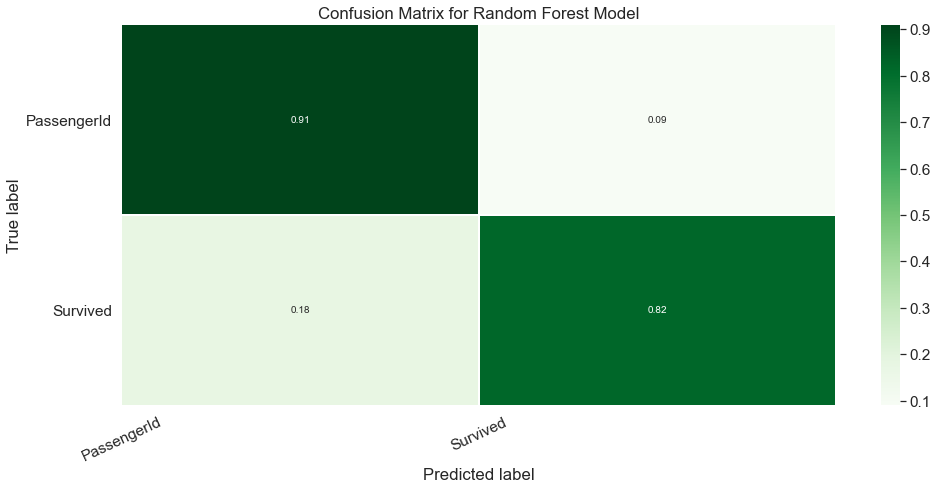

In [73]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(test_target, RFC_probability)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['PassengerId', 'Survived']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## 分類報告 ( Classification report )

In [74]:
# 分類報告
"""
為了更深入地了解模型性能，我們應該檢查其他指標，例如精度，召回率和F1得分。
 - Precision(精度)：是類別中正確識別的成員數除以模型預測該類別的所有時間。
 - Recall(召回率)：是分類器正確識別的類的成員數除以該類中的成員總數。
 - F1 score：不太直觀，因為它將精度和召回率結合到一個度量標準中。
             如果精度和召回率都很高，則F1也將很高。
             如果它們都為低，則F1將為低。
             如果一個高而另一個低，則F1將為低。
             
             F1是一種快速的方法，可以判斷分類器實際上是否擅長識別類的成員。
"""

# 查看測試報告和預測的分類報告
print( classification_report(test_target, RFC_probability) )

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       266
           1       0.84      0.82      0.83       152

    accuracy                           0.88       418
   macro avg       0.87      0.87      0.87       418
weighted avg       0.88      0.88      0.88       418



In [75]:
import joblib

# save
joblib.dump(RFC, "titanic_random_forest.joblib")

# load
RFC = joblib.load("titanic_random_forest.joblib")

# SVM

In [76]:
# # 數據處理
# from sklearn.preprocessing import LabelEncoder
# from sklearn import feature_selection
# from sklearn import model_selection
# from sklearn import metrics
# path_train = 'D:\\機器學習\\Example1_titanic\\train.csv'
# path_test = 'D:\\機器學習\\Example1_titanic\\test.csv'
# raw_data = pd.read_csv(path_train)
# test_data = pd.read_csv(path_test)
# data_cleaner = [raw_data, test_data]

In [77]:
from sklearn.model_selection import KFold
from sklearn import ensemble, metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import math

In [78]:
# svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# # 10-fold cross-validation 加入交叉驗證，保證模型的可靠度
# kfold = KFold(10, True)
# predicted = []
# expected = []

# #訓練模型
# for train, test in kfold.split(dataset_data):
#     # 將資料拆成 train 和 test 
#     X_train = dataset_data.iloc[train]
#     Y_train = dataset_target2.iloc[train]
#     X_test = dataset_data.iloc[test]
#     Y_test = dataset_target2.iloc[test]
    
#     # 選擇 one-against-rest 的 SVM分類器
#     svm = OneVsRestClassifier(SVC(gamma = 'scale')).fit(X_train, Y_train)
#     expected.extend(Y_test)
#     predicted.extend(svm.predict(X_test))


SVM = SVC()
SVM.fit( dataset_data , dataset_target2 )


SVC()

In [79]:
SVM_probability = SVM.predict(testset)
# print(probability)

SVM_predict_set = pd.DataFrame()
SVM_predict_set["PassengerId"] = submit_set["PassengerId"]
SVM_predict_set["Survived"] = SVM_probability
# print(predict_set)

SVM_predict_set["Survived"] = SVM_predict_set["Survived"].map(predict_map) #注意這裡傳入的是函數名，不帶括號。

print(SVM_predict_set)

SVM_predict_set.to_csv("Submission_SVM.csv", index = 0)


     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [80]:
SVM_score = SVM.score(testset, test_target)
print ('\nTest Acc:', SVM_score)


Test Acc: 0.9401913875598086


In [81]:
import joblib

# save
joblib.dump(SVM, "titanic_SVM.pkl")

# load
SVM = joblib.load("titanic_SVM.pkl")